In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
raw_data=pd.read_csv('C:/Users/nazil/Downloads/NEW/Datafiles/MobilePriceRange.csv')

In [3]:
raw_data.head(9)

,battery_power,int_memory,fc,n_cores,ram,talk_time,dual_sim,wifi,pc,mobile_wt,price_range
0,842,7,1,2,2549,19,0,1,2,188,Medium
1,1021,53,0,3,2631,7,1,0,6,136,High
2,563,41,2,5,2603,9,1,0,6,145,High
3,615,10,0,6,2769,11,0,0,9,131,High
4,1821,44,13,2,1411,15,0,0,14,141,Medium
5,1859,22,3,1,1067,10,1,0,7,164,Medium
6,1821,10,4,8,3220,18,0,1,10,139,VeryHigh
7,1954,24,0,4,700,5,1,1,0,187,Low
8,1445,53,0,7,1099,20,0,0,14,174,Low


# Check missing values

In [4]:
raw_data.isnull().sum()

battery_power    0
int_memory       0
fc               0
n_cores          0
ram              0
talk_time        0
dual_sim         0
wifi             0
pc               0
mobile_wt        0
price_range      0
dtype: int64

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   battery_power  2000 non-null   int64 
 1   int_memory     2000 non-null   int64 
 2   fc             2000 non-null   int64 
 3   n_cores        2000 non-null   int64 
 4   ram            2000 non-null   int64 
 5   talk_time      2000 non-null   int64 
 6   dual_sim       2000 non-null   int64 
 7   wifi           2000 non-null   int64 
 8   pc             2000 non-null   int64 
 9   mobile_wt      2000 non-null   int64 
 10  price_range    2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB


# Encoding

In [6]:
# Define the encoding for the 'PriceRange' categories
price_range_encoding = {'Low': 0,'Medium': 1,'High': 2,'VeryHigh': 3}

# Apply the encoding to the 'PriceRange' column
raw_data['EncodedPrice'] = raw_data['price_range'].map(price_range_encoding)

raw_data.drop('price_range',axis=1,inplace=True)
raw_data = raw_data.rename(columns={'EncodedPrice': 'price_range'})
# Display the updated DataFrame
raw_data.head(100)

,battery_power,int_memory,fc,n_cores,ram,talk_time,dual_sim,wifi,pc,mobile_wt,price_range
0,842,7,1,2,2549,19,0,1,2,188,1
1,1021,53,0,3,2631,7,1,0,6,136,2
2,563,41,2,5,2603,9,1,0,6,145,2
3,615,10,0,6,2769,11,0,0,9,131,2
4,1821,44,13,2,1411,15,0,0,14,141,1
...,...,...,...,...,...,...,...,...,...,...,...
95,1137,7,18,3,3616,12,0,1,19,196,3
96,1355,23,10,5,880,8,0,0,16,132,0
97,1665,60,3,6,1601,14,0,0,18,194,2
98,657,37,0,2,1412,18,0,0,1,141,0


In [155]:
raw_data.to_csv('Modified.csv', index=False)

In [7]:
raw_data.describe()

,battery_power,int_memory,fc,n_cores,ram,talk_time,dual_sim,wifi,pc,mobile_wt,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,32.046500,4.309500,4.520500,2124.213000,11.011000,0.509500,0.507000,9.916500,140.249000,1.500000
std,439.418206,18.145715,4.341444,2.287837,1084.732044,5.463955,0.500035,0.500076,6.064315,35.399655,1.118314
min,501.000000,2.000000,0.000000,1.000000,256.000000,2.000000,0.000000,0.000000,0.000000,80.000000,0.000000
25%,851.750000,16.000000,1.000000,3.000000,1207.500000,6.000000,0.000000,0.000000,5.000000,109.000000,0.750000
50%,1226.000000,32.000000,3.000000,4.000000,2146.500000,11.000000,1.000000,1.000000,10.000000,141.000000,1.500000
75%,1615.250000,48.000000,7.000000,7.000000,3064.500000,16.000000,1.000000,1.000000,15.000000,170.000000,2.250000
max,1998.000000,64.000000,19.000000,8.000000,3998.000000,20.000000,1.000000,1.000000,20.000000,200.000000,3.000000


# Data Distribution

<Axes: xlabel='price_range', ylabel='count'>

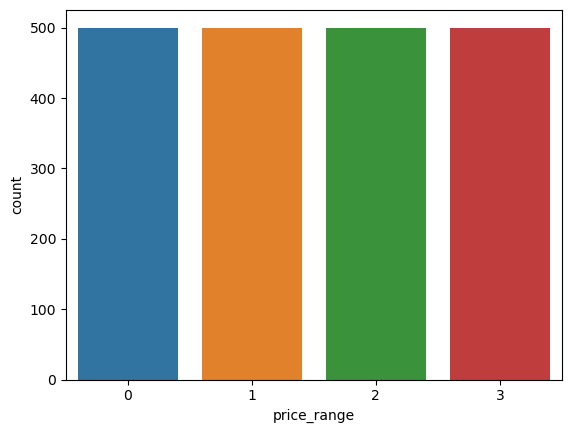

In [8]:
sns.countplot(x='price_range', data=raw_data)

Lets how the battery mAh is spread.

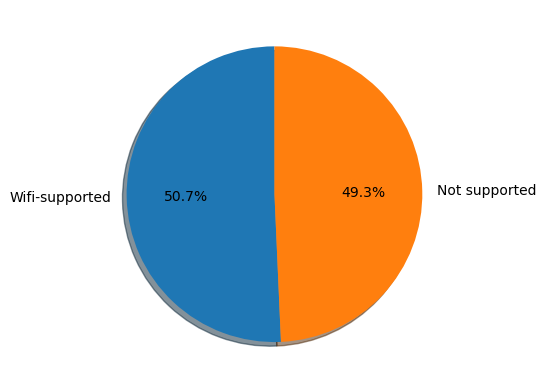

In [9]:
labels = ["Wifi-supported",'Not supported']
values=raw_data['wifi'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

C:\Users\nazil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


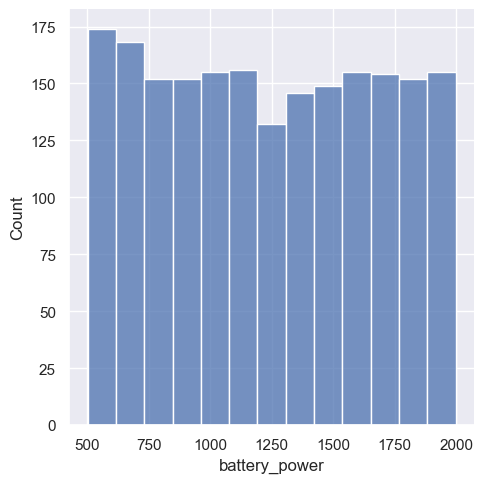

In [10]:
sns.set(rc={'figure.figsize':(5,5)})
dd =sns.displot(data=raw_data["battery_power"])
plt.show()

Next, we analyse the Screen width.



C:\Users\nazil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


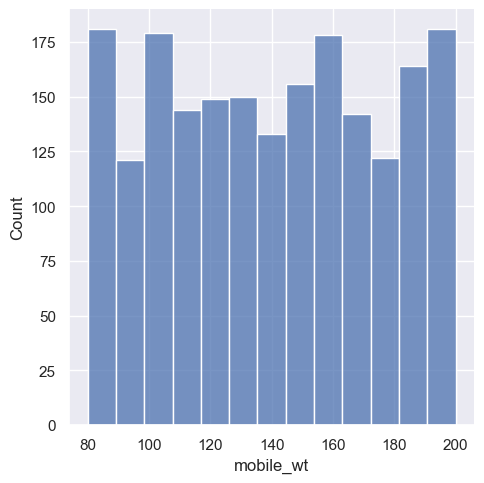

In [11]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=raw_data["mobile_wt"])
plt.show()

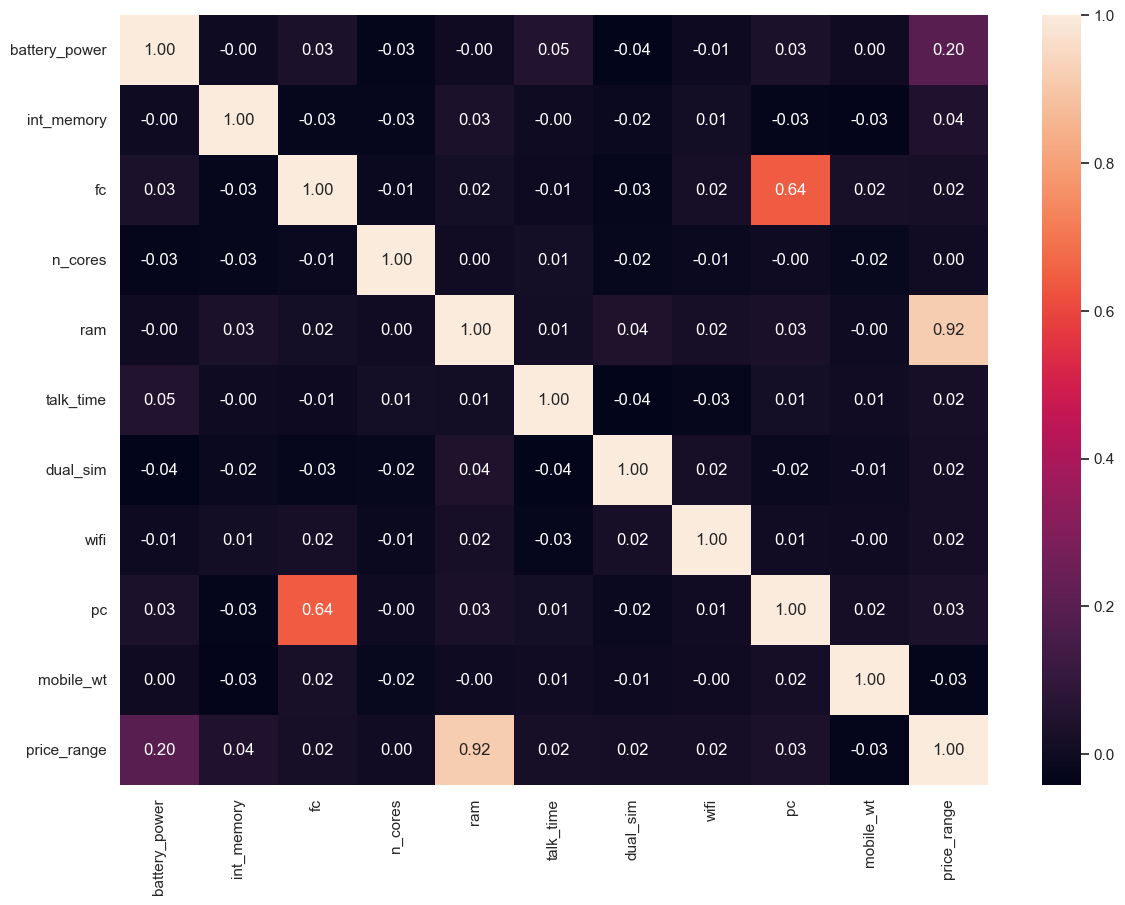

In [12]:
plt.figure(figsize=(14,10))
sns.heatmap(raw_data.corr(), annot=True, fmt=".2f");

# Price range according to the no of cores and battery power

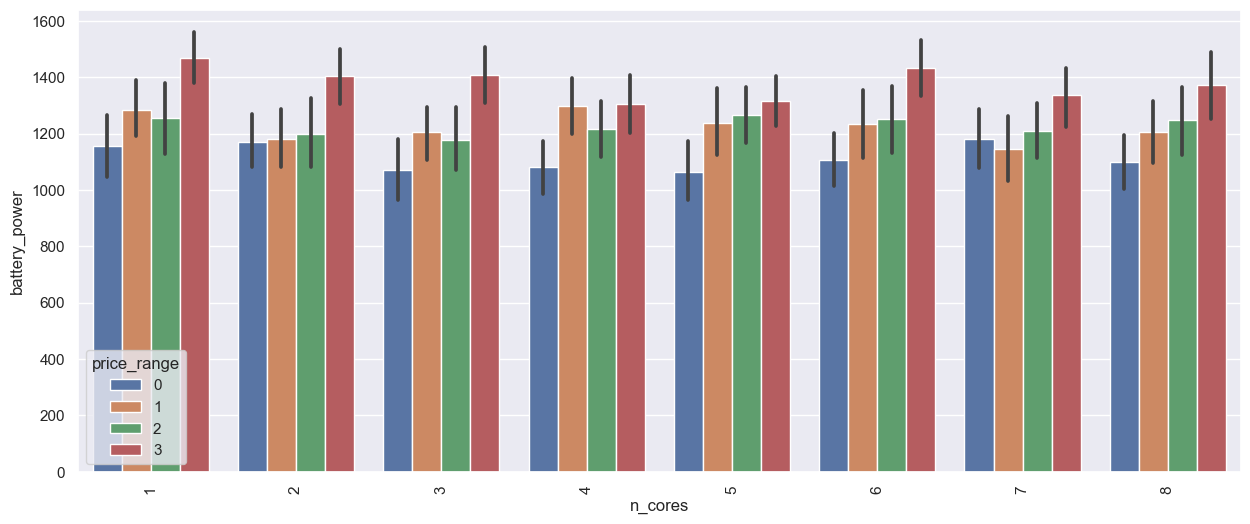

In [13]:
plt.figure(figsize=(15,6));
sns.barplot( x= "n_cores", y = "battery_power" ,hue="price_range", data=raw_data)
plt.xticks(rotation=90);

C:\Users\nazil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


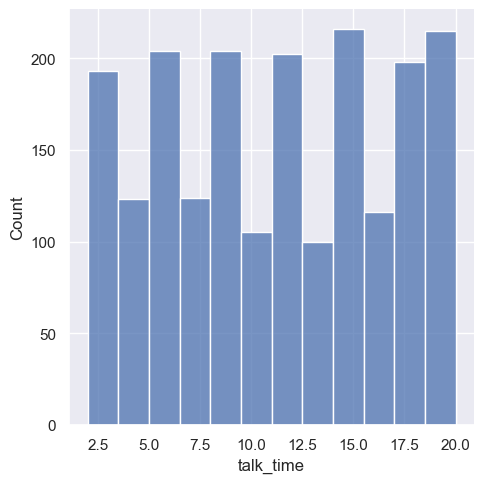

In [14]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=raw_data["talk_time"])
plt.show()

# RAM vs Price Range

<Axes: xlabel='price_range', ylabel='ram'>

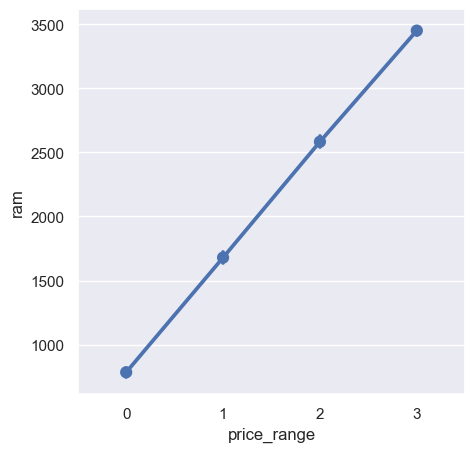

In [15]:
sns.pointplot(y="ram", x="price_range", data=raw_data)

C:\Users\nazil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


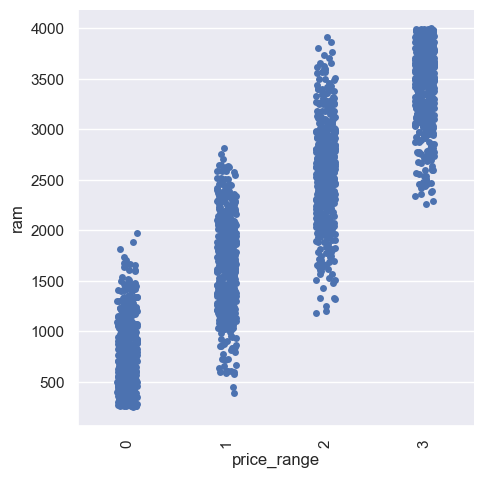

In [16]:
sns.catplot(x="price_range",y="ram",data=raw_data)
plt.xticks(rotation=90);

A few mobiles are very thin and a few ones are almost a cm thick

# Split the data 

In [17]:
X = raw_data.drop('price_range',axis=1)
y = raw_data['price_range']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=120)

### Standard Scaler

In [19]:
scaler=StandardScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.fit_transform(X_test))

In [20]:
X_train

,0,1,2,3,4,5,6,7,8,9
0,-1.405466,-1.611601,-0.760358,1.521567,1.305388,-1.468024,-1.016808,0.991150,-0.482307,-1.077406
1,-0.534595,-0.616824,0.162064,1.521567,-0.762504,0.177788,0.983470,-1.008929,0.342463,1.265736
2,-0.582220,-0.229966,2.006909,-0.222905,-0.903076,1.274996,-1.016808,-1.008929,1.662095,1.181044
3,1.445278,-0.782620,-0.068541,-0.659023,1.116725,-0.736552,-1.016808,-1.008929,-0.812215,-0.061104
4,-1.437217,0.654281,2.468120,-1.531259,0.421262,0.726392,-1.016808,0.991150,1.002279,-0.653947
...,...,...,...,...,...,...,...,...,...,...
1795,1.107361,1.538528,3.159937,-0.222905,-0.837414,1.640732,0.983470,-1.008929,1.662095,0.870507
1796,-1.069818,-0.395762,-0.299147,-0.222905,-1.253582,1.640732,-1.016808,-1.008929,-0.647261,-1.529096
1797,-1.210427,-1.058947,1.545698,1.521567,-1.533801,-1.102288,-1.016808,0.991150,0.837325,-1.670249
1798,1.211685,-0.948416,-0.990963,-0.222905,-0.530374,-0.187948,0.983470,-1.008929,-0.482307,-1.133867


In [21]:
X_test

,0,1,2,3,4,5,6,7,8,9
0,1.870643,-0.864546,-0.324631,-1.613985,-0.226259,1.135473,-1.040833,0.941697,0.519209,1.139483
1,0.164076,1.456746,-1.010471,0.176844,1.066343,0.950542,-1.040833,0.941697,-1.458731,-1.054570
2,-0.827673,-0.540645,-0.324631,0.176844,-1.469423,-0.159040,-1.040833,0.941697,-0.469761,1.680872
3,-1.516453,1.402762,0.361209,-0.718570,0.048801,-0.713831,0.960769,0.941697,0.354381,-1.709937
4,0.980672,-1.188447,-0.324631,-1.613985,0.750833,-1.453553,-1.040833,-1.061913,0.519209,-0.684146
...,...,...,...,...,...,...,...,...,...,...
195,0.748711,0.916910,0.361209,0.176844,0.637573,0.025890,-1.040833,0.941697,0.684038,0.056703
196,-1.213484,-1.566332,-1.010471,-0.718570,-1.547626,-0.528901,-1.040833,0.941697,-1.293902,-1.481983
197,0.462311,0.808943,-1.010471,1.072259,0.248354,0.765612,0.960769,0.941697,-1.458731,-0.085768
198,0.968837,1.780647,0.589823,-0.270863,-1.053237,-0.343971,-1.040833,-1.061913,0.354381,1.139483


# Decision Tree Classifier 

In [22]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train , y_train)

DecisionTreeClassifier()

In [23]:
DTC_predict = DTC.predict(X_test)
DTC_predict

array([1, 3, 0, 2, 3, 1, 1, 2, 2, 1, 1, 3, 3, 3, 1, 3, 1, 1, 0, 3, 0, 0,
       1, 0, 1, 3, 3, 3, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 3, 1, 3, 3,
       3, 1, 0, 2, 3, 1, 2, 2, 1, 3, 3, 3, 2, 1, 2, 1, 2, 3, 2, 0, 0, 2,
       0, 0, 0, 3, 3, 2, 2, 1, 0, 1, 1, 3, 3, 3, 2, 3, 0, 3, 2, 2, 3, 2,
       0, 2, 1, 3, 3, 0, 1, 0, 0, 1, 0, 1, 3, 1, 2, 2, 1, 3, 3, 0, 0, 2,
       1, 2, 3, 0, 2, 3, 3, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0,
       1, 2, 0, 3, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 3, 3, 3, 2, 1, 3, 0, 0,
       1, 0, 2, 3, 2, 2, 3, 3, 0, 2, 3, 2, 0, 0, 3, 0, 2, 0, 2, 3, 0, 2,
       1, 0, 0, 3, 3, 3, 2, 1, 0, 3, 1, 3, 3, 1, 2, 0, 2, 1, 1, 2, 0, 2,
       0, 2], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
DTC_acc = accuracy_score(DTC_predict,y_test)
print(DTC_acc)

0.73


# Support Vector Classifier

In [25]:
from sklearn.svm import SVC

In [26]:
KNN= SVC(kernel='linear', C=1.0, gamma='scale')

In [27]:
KNN.fit(X_train, y_train)


SVC(kernel='linear')

In [28]:
y_pre = KNN.predict(X_test)

In [29]:
y_pre

array([2, 3, 0, 1, 3, 1, 2, 2, 3, 1, 0, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 0,
       1, 0, 1, 3, 2, 3, 0, 1, 0, 1, 0, 0, 2, 1, 0, 3, 0, 1, 3, 0, 3, 2,
       3, 0, 0, 2, 3, 1, 2, 3, 1, 3, 3, 3, 2, 0, 2, 1, 2, 3, 3, 0, 0, 2,
       0, 0, 0, 3, 3, 2, 2, 1, 0, 1, 1, 2, 3, 3, 2, 2, 0, 3, 3, 2, 3, 2,
       0, 2, 1, 3, 3, 0, 0, 0, 0, 1, 1, 1, 3, 2, 1, 2, 1, 3, 3, 0, 0, 2,
       1, 2, 3, 0, 2, 3, 3, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       1, 1, 0, 3, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 3, 3, 3, 2, 1, 2, 0, 0,
       1, 0, 2, 3, 1, 3, 2, 3, 0, 2, 3, 2, 0, 0, 2, 1, 2, 0, 2, 3, 0, 2,
       1, 0, 1, 2, 2, 3, 2, 1, 0, 3, 2, 3, 3, 2, 1, 0, 2, 1, 2, 3, 0, 2,
       1, 3], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pre)
accuracy

0.85

# Naive Bayes

# Gaussian 

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
NBC_gu=GaussianNB()
NBC_gu.fit(X_train,y_train)
NBC_gu.score (X_test,y_test)

0.855

In [33]:
y_pre=NBC_gu.predict(X_test)

In [34]:
y_pre

array([1, 3, 0, 1, 3, 1, 2, 2, 3, 1, 0, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 0,
       1, 0, 1, 3, 3, 3, 0, 1, 0, 1, 0, 0, 2, 1, 0, 3, 0, 1, 3, 0, 3, 2,
       3, 0, 0, 2, 3, 1, 2, 3, 1, 3, 2, 3, 1, 0, 2, 1, 2, 3, 3, 1, 0, 2,
       0, 0, 0, 3, 3, 2, 2, 1, 0, 1, 1, 2, 3, 3, 2, 2, 0, 3, 2, 2, 3, 2,
       0, 2, 1, 3, 3, 0, 0, 0, 0, 1, 1, 1, 3, 2, 1, 2, 2, 3, 2, 0, 0, 2,
       1, 2, 3, 0, 2, 3, 3, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       2, 1, 0, 3, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 3, 3, 3, 2, 1, 2, 0, 0,
       1, 0, 2, 3, 1, 3, 3, 3, 0, 2, 3, 2, 0, 0, 3, 1, 2, 0, 2, 3, 0, 2,
       1, 0, 0, 2, 2, 3, 2, 1, 0, 3, 2, 3, 3, 1, 1, 0, 2, 1, 2, 2, 0, 2,
       0, 3], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [36]:
confusion_matrix(y_pre,y_test)

array([[49,  7,  0,  0],
       [ 4, 38,  4,  0],
       [ 0,  4, 39,  6],
       [ 0,  0,  4, 45]], dtype=int64)

In [37]:
accuracy_score(y_pre,y_test)

0.855

In [38]:
classification_report(y_pre,y_test)

'              precision    recall  f1-score   support\n\n           0       0.92      0.88      0.90        56\n           1       0.78      0.83      0.80        46\n           2       0.83      0.80      0.81        49\n           3       0.88      0.92      0.90        49\n\n    accuracy                           0.85       200\n   macro avg       0.85      0.85      0.85       200\nweighted avg       0.86      0.85      0.86       200\n'

# Multinomial

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler=MinMaxScaler()

In [41]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [42]:
NBC_MU=MultinomialNB()

In [43]:
NBC_MU.fit(X_train_scaled, y_train)

MultinomialNB()

In [44]:
accuracy=NBC_MU.score(X_test_scaled, y_test)

In [45]:
NBC_MU.score (X_test,y_test)

0.53

In [46]:
y_pre=NBC_gu.predict(X_test)

In [47]:
y_pre

array([1, 3, 0, 1, 3, 1, 2, 2, 3, 1, 0, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 0,
       1, 0, 1, 3, 3, 3, 0, 1, 0, 1, 0, 0, 2, 1, 0, 3, 0, 1, 3, 0, 3, 2,
       3, 0, 0, 2, 3, 1, 2, 3, 1, 3, 2, 3, 1, 0, 2, 1, 2, 3, 3, 1, 0, 2,
       0, 0, 0, 3, 3, 2, 2, 1, 0, 1, 1, 2, 3, 3, 2, 2, 0, 3, 2, 2, 3, 2,
       0, 2, 1, 3, 3, 0, 0, 0, 0, 1, 1, 1, 3, 2, 1, 2, 2, 3, 2, 0, 0, 2,
       1, 2, 3, 0, 2, 3, 3, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       2, 1, 0, 3, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 3, 3, 3, 2, 1, 2, 0, 0,
       1, 0, 2, 3, 1, 3, 3, 3, 0, 2, 3, 2, 0, 0, 3, 1, 2, 0, 2, 3, 0, 2,
       1, 0, 0, 2, 2, 3, 2, 1, 0, 3, 2, 3, 3, 1, 1, 0, 2, 1, 2, 2, 0, 2,
       0, 3], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [49]:
confusion_matrix(y_pre,y_test)

array([[49,  7,  0,  0],
       [ 4, 38,  4,  0],
       [ 0,  4, 39,  6],
       [ 0,  0,  4, 45]], dtype=int64)

In [50]:
accuracy_score(y_pre,y_test)

0.855

In [51]:
classification_report(y_pre,y_test)

'              precision    recall  f1-score   support\n\n           0       0.92      0.88      0.90        56\n           1       0.78      0.83      0.80        46\n           2       0.83      0.80      0.81        49\n           3       0.88      0.92      0.90        49\n\n    accuracy                           0.85       200\n   macro avg       0.85      0.85      0.85       200\nweighted avg       0.86      0.85      0.86       200\n'

# Bernoulli

In [52]:
from sklearn.naive_bayes import BernoulliNB

In [53]:
NBC_BU=BernoulliNB()
NBC_BU.fit(X_train,y_train)
NBC_BU.score(X_test,y_test)

0.515

In [54]:
y_pre=NBC_gu.predict(X_test)

In [55]:
y_pre

array([1, 3, 0, 1, 3, 1, 2, 2, 3, 1, 0, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 0,
       1, 0, 1, 3, 3, 3, 0, 1, 0, 1, 0, 0, 2, 1, 0, 3, 0, 1, 3, 0, 3, 2,
       3, 0, 0, 2, 3, 1, 2, 3, 1, 3, 2, 3, 1, 0, 2, 1, 2, 3, 3, 1, 0, 2,
       0, 0, 0, 3, 3, 2, 2, 1, 0, 1, 1, 2, 3, 3, 2, 2, 0, 3, 2, 2, 3, 2,
       0, 2, 1, 3, 3, 0, 0, 0, 0, 1, 1, 1, 3, 2, 1, 2, 2, 3, 2, 0, 0, 2,
       1, 2, 3, 0, 2, 3, 3, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       2, 1, 0, 3, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 3, 3, 3, 2, 1, 2, 0, 0,
       1, 0, 2, 3, 1, 3, 3, 3, 0, 2, 3, 2, 0, 0, 3, 1, 2, 0, 2, 3, 0, 2,
       1, 0, 0, 2, 2, 3, 2, 1, 0, 3, 2, 3, 3, 1, 1, 0, 2, 1, 2, 2, 0, 2,
       0, 3], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [57]:
confusion_matrix(y_pre,y_test)

array([[49,  7,  0,  0],
       [ 4, 38,  4,  0],
       [ 0,  4, 39,  6],
       [ 0,  0,  4, 45]], dtype=int64)

In [58]:
accuracy_score(y_pre,y_test)

0.855

In [59]:
classification_report(y_pre,y_test)

'              precision    recall  f1-score   support\n\n           0       0.92      0.88      0.90        56\n           1       0.78      0.83      0.80        46\n           2       0.83      0.80      0.81        49\n           3       0.88      0.92      0.90        49\n\n    accuracy                           0.85       200\n   macro avg       0.85      0.85      0.85       200\nweighted avg       0.86      0.85      0.86       200\n'

# k-Nearest Neighbors

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn=KNeighborsClassifier(n_neighbors=80)

In [62]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=80)

In [63]:
knn.score(X_test,y_test)

0.645

# Elbow

In [64]:
from sklearn.model_selection import cross_val_score
accuracy_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10)
    accuracy_rate.append(score.mean())

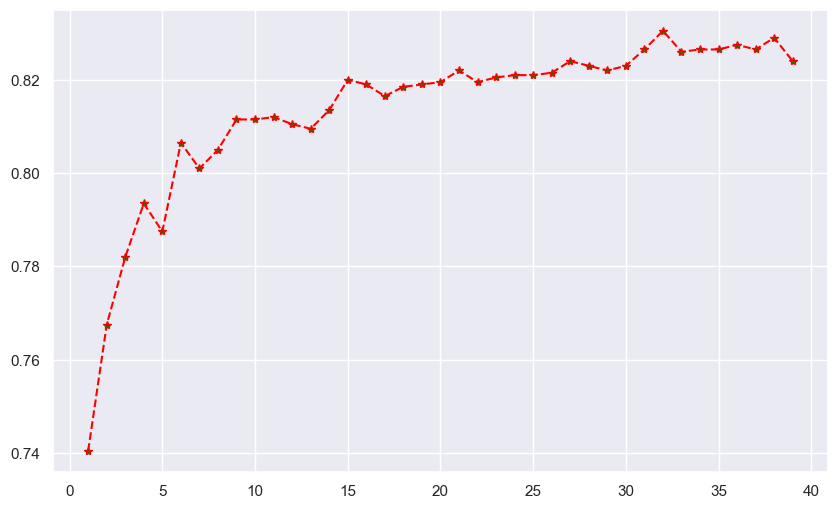

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='red',linestyle='dashed',marker='*',markerfacecolor='green')

In [66]:
y_pre=NBC_gu.predict(X_test)

In [67]:
y_pre

array([1, 3, 0, 1, 3, 1, 2, 2, 3, 1, 0, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 0,
       1, 0, 1, 3, 3, 3, 0, 1, 0, 1, 0, 0, 2, 1, 0, 3, 0, 1, 3, 0, 3, 2,
       3, 0, 0, 2, 3, 1, 2, 3, 1, 3, 2, 3, 1, 0, 2, 1, 2, 3, 3, 1, 0, 2,
       0, 0, 0, 3, 3, 2, 2, 1, 0, 1, 1, 2, 3, 3, 2, 2, 0, 3, 2, 2, 3, 2,
       0, 2, 1, 3, 3, 0, 0, 0, 0, 1, 1, 1, 3, 2, 1, 2, 2, 3, 2, 0, 0, 2,
       1, 2, 3, 0, 2, 3, 3, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       2, 1, 0, 3, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 3, 3, 3, 2, 1, 2, 0, 0,
       1, 0, 2, 3, 1, 3, 3, 3, 0, 2, 3, 2, 0, 0, 3, 1, 2, 0, 2, 3, 0, 2,
       1, 0, 0, 2, 2, 3, 2, 1, 0, 3, 2, 3, 3, 1, 1, 0, 2, 1, 2, 2, 0, 2,
       0, 3], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [69]:
confusion_matrix(y_pre,y_test)

array([[49,  7,  0,  0],
       [ 4, 38,  4,  0],
       [ 0,  4, 39,  6],
       [ 0,  0,  4, 45]], dtype=int64)

In [70]:
accuracy_score(y_pre,y_test)

0.855

In [71]:
classification_report(y_pre,y_test)

'              precision    recall  f1-score   support\n\n           0       0.92      0.88      0.90        56\n           1       0.78      0.83      0.80        46\n           2       0.83      0.80      0.81        49\n           3       0.88      0.92      0.90        49\n\n    accuracy                           0.85       200\n   macro avg       0.85      0.85      0.85       200\nweighted avg       0.86      0.85      0.86       200\n'

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression  

In [73]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [74]:
y_predict = LR.predict(X_test)
y_predict

array([2, 3, 0, 1, 3, 1, 2, 2, 3, 1, 0, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 0,
       1, 0, 1, 3, 2, 3, 0, 1, 0, 1, 0, 0, 2, 1, 0, 3, 0, 1, 3, 0, 3, 2,
       3, 1, 0, 2, 3, 1, 2, 3, 1, 3, 3, 3, 2, 0, 2, 1, 2, 3, 3, 0, 0, 2,
       0, 0, 0, 3, 3, 2, 2, 1, 0, 1, 1, 2, 3, 3, 2, 2, 0, 3, 3, 2, 3, 2,
       0, 2, 1, 3, 3, 0, 0, 0, 0, 1, 1, 1, 3, 2, 1, 2, 1, 3, 3, 0, 0, 2,
       1, 2, 3, 0, 2, 3, 3, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       1, 1, 0, 3, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 3, 3, 3, 2, 1, 2, 0, 0,
       1, 0, 2, 3, 1, 3, 2, 3, 0, 2, 3, 2, 0, 0, 2, 1, 2, 0, 2, 3, 0, 2,
       1, 0, 1, 2, 2, 3, 2, 1, 0, 3, 2, 3, 3, 2, 1, 0, 2, 1, 2, 3, 0, 2,
       1, 3], dtype=int64)

In [75]:
LR.score(X_train,y_train)

0.8283333333333334

In [76]:
y_pre=LR.predict(X_test)

In [77]:
LR.score(X_test,y_pre)

1.0

In [78]:
from sklearn.metrics import accuracy_score,classification_report

In [79]:
s=accuracy_score(y_pre,y_test)
print(s)

0.855


In [80]:
print(classification_report(y_pre,y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.86      0.82      0.84        51
           2       0.77      0.77      0.77        47
           3       0.86      0.88      0.87        50

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
RF=RandomForestClassifier()

In [150]:
RF = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=50)

In [151]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=50)

In [152]:
y_predict = RF.predict(X_test)
y_predict

array([2, 3, 0, 1, 3, 1, 2, 2, 3, 1, 0, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 0,
       1, 0, 1, 3, 2, 3, 0, 1, 0, 1, 0, 0, 2, 1, 0, 3, 0, 1, 3, 0, 3, 2,
       3, 0, 0, 2, 3, 1, 2, 3, 1, 3, 3, 3, 2, 0, 2, 1, 2, 3, 3, 0, 0, 2,
       0, 0, 0, 3, 3, 2, 2, 1, 0, 1, 1, 2, 3, 3, 2, 2, 0, 3, 3, 2, 3, 2,
       0, 2, 1, 3, 3, 0, 0, 0, 0, 1, 1, 1, 3, 2, 1, 3, 1, 3, 3, 0, 0, 2,
       1, 2, 3, 0, 2, 3, 3, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 1, 0, 3, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 3, 3, 3, 2, 1, 2, 0, 0,
       1, 0, 2, 3, 1, 2, 2, 3, 0, 2, 3, 2, 0, 0, 3, 1, 2, 0, 2, 3, 0, 2,
       1, 0, 1, 2, 2, 3, 2, 1, 0, 3, 1, 3, 3, 1, 1, 0, 2, 1, 2, 2, 0, 2,
       1, 3], dtype=int64)

In [153]:
print('Classification Report:\n')
print(classification_report(y_test,y_predict))

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.82      0.84      0.83        49
           2       0.78      0.77      0.77        47
           3       0.88      0.86      0.87        51

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



In [154]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
accuracy


0.85

# Gradient Boosting

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gbc=GradientBoostingClassifier()

In [90]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [91]:
gbc_y_pre=gbc.predict(X_test)

In [92]:
gbc_y_pre

array([2, 3, 0, 1, 3, 1, 2, 2, 3, 1, 0, 2, 3, 3, 1, 3, 1, 1, 1, 3, 0, 0,
       1, 0, 1, 3, 2, 3, 0, 1, 0, 1, 0, 0, 2, 1, 0, 3, 0, 1, 3, 0, 3, 2,
       3, 1, 0, 2, 3, 1, 2, 3, 1, 3, 3, 3, 2, 0, 2, 1, 2, 3, 2, 0, 0, 2,
       0, 0, 0, 3, 3, 2, 2, 1, 0, 1, 1, 2, 3, 3, 2, 2, 0, 3, 3, 2, 3, 2,
       0, 2, 1, 3, 3, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 2, 1, 3, 3, 0, 0, 2,
       1, 2, 3, 0, 2, 3, 3, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 3, 1, 0, 1, 2, 1, 2, 0, 1, 2, 2, 3, 3, 3, 2, 1, 2, 0, 0,
       1, 0, 2, 3, 1, 2, 2, 3, 0, 2, 3, 2, 0, 0, 3, 1, 2, 0, 2, 3, 0, 2,
       1, 0, 1, 2, 2, 3, 2, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 1, 2, 3, 0, 2,
       1, 3], dtype=int64)

In [115]:
print('Classification Report:\n')
print(classification_report(y_test, gbc_y_pre))

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        53
           1       0.83      0.82      0.82        49
           2       0.73      0.79      0.76        47
           3       0.88      0.82      0.85        51

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [94]:
from sklearn.metrics import accuracy_score

In [95]:
s=accuracy_score(y_pre,y_test)

In [96]:
s

0.855

# Dashboard

In [97]:
 #pip install dash

In [98]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd 
 
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Machine Learning Algorithm Accuracy Dashboard", style={'color': ' cyan'}),
    
    dcc.Dropdown(
        id='algorithm-selector',
        options=[
            {'label': 'Random Forest', 'value': 'RF'},
            {'label': 'Support Vector Classifier', 'value': 'SVC'},
            {'label': 'Decision Tree Classifier', 'value': 'DTC'},
            {'label': 'Gradient Boosting', 'value': 'GB'},
            {'label': 'LogisticRegression ', 'value': 'LR'},
            {'label': 'Naive Bayes(Gaussian)', 'value': 'Gaussian'},
            {'label': 'Naive Bayes(Multinomial)', 'value': 'Multinomial'},
            {'label': 'Naive Bayes(Bernoulli)', 'value': 'Bernoulli'},
            {'label': 'K-Nearest Neighbour', 'value': 'KNN'},
        ],
        multi=True, 
        value=['random_forest'],  
        style={'background-color': 'lightgray', 'color': 'black'},
    ),
    
    dcc.Graph(
        id='accuracy-graph',
        style={'border': '1px solid gray', 'margin-top': '20px'},
    ),
])


accuracies = {
    'RF':{'accuracy': 0.855, 'color': 'red'},             
    'SVC':  {'accuracy': 0.85, 'color': 'green'},
    'DTC':  {'accuracy':  0.74, 'color': 'Yellow'},
    'GB' :{ 'accuracy': 0.855, 'color': 'Indigo'},
    'LR':  {'accuracy': 0.828, 'color': 'cyan'},
    'Gaussian':{ 'accuracy': 0.855,'color': 'pink'},
    'Multinomial':{'accuracy': 0.53,'color': 'Purple'},
    'Bernoulli':{'accuracy': 0.515,'color': 'blue'},
    'KNN': {'accuracy': 0.645, 'color': 'Orange'},
}

@app.callback(
    Output('accuracy-graph', 'figure'),
    Input('algorithm-selector', 'value')
)
def update_accuracy_graph(selected_algorithms):
    data = []
    colors = []
    for algorithm in selected_algorithms:
        accuracy_data = accuracies.get(algorithm, {'accuracy': 0.0, 'color': 'gray'})
        accuracy = accuracy_data['accuracy']
        color = accuracy_data['color']
        data.append({'Algorithm': algorithm, 'Accuracy': accuracy})
        colors.append(color)
    
    df = pd.DataFrame(data)
    fig = {
        'data': [
            {
                'x': df['Algorithm'],
                'y': df['Accuracy'],
                'type': 'bar',
                'name': 'Accuracy',
                'marker': {'color': colors}  # Assign individual colors
            },
        ],
        'layout': {
            'title': 'Algorithm Accuracy Comparison',
            'bargap': 0.3, 
            'bargroupgap': 0.2 
        }
    }
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\nazil\AppData\Local\Temp\ipykernel_10448\2095659807.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\nazil\AppData\Local\Temp\ipykernel_10448\2095659807.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [99]:
import joblib

In [132]:
joblib.dump(gbc,'gradient_b_joblib_model')

['gradient_b_joblib_model']